In [42]:
# install.packages("C50")
# install.packages("caret")
# install.packages("ggpubr")
# install.packages("factoextra")
# install.packages("devtools")
# install.packages("outliers")

# install.packages("smotefamily")

In [43]:
library ( C50         )
library ( caret       )
library ( ggpubr      )
library ( devtools    )
library ( outliers    )
library ( smotefamily )


library (  factoextra    )
# install_github("vqv/ggbiplot")
library (  ggbiplot      )
library(readr)


In [242]:
data <- read_delim("./datasets/ENB2012_data_f.csv", delim = ';')

Rows: 768 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ";"
dbl (10): X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [243]:
data[, -c(9:10)]

X1,X2,X3,X4,X5,X6,X7,X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.98,514.5,294.0,110.25,7.0,2,0,0
0.98,514.5,294.0,110.25,7.0,3,0,0
0.98,514.5,294.0,110.25,7.0,4,0,0
0.98,514.5,294.0,110.25,7.0,5,0,0
0.90,563.5,318.5,122.50,7.0,2,0,0
0.90,563.5,318.5,122.50,7.0,3,0,0
0.90,563.5,318.5,122.50,7.0,4,0,0
0.90,563.5,318.5,122.50,7.0,5,0,0
0.86,588.0,294.0,147.00,7.0,2,0,0


In [244]:
df <- data[, -c(9:10)]

df_normalizado <- as.data.frame(scale(df[, sapply(df, is.numeric)]))

df_normalizado <- cbind(df[, !sapply(df, is.numeric)], df_normalizado)

head(df_normalizado)

,X1,X2,X3,X4,X5,X6,X7,X8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,-1.3407670,-1.7593,-1.813393
2,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,-0.4469223,-1.7593,-1.813393
3,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,0.4469223,-1.7593,-1.813393
4,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,1.3407670,-1.7593,-1.813393
5,1.284142,-1.228438,0.0000000,-1.197897,0.9993487,-1.3407670,-1.7593,-1.813393
6,1.284142,-1.228438,0.0000000,-1.197897,0.9993487,-0.4469223,-1.7593,-1.813393


In [245]:
head( df, 3 )

X1,X2,X3,X4,X5,X6,X7,X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.98,514.5,294,110.25,7,2,0,0
0.98,514.5,294,110.25,7,3,0,0
0.98,514.5,294,110.25,7,4,0,0


In [205]:
# Convertir las columnas a factores
df_normalizado <- as.data.frame(lapply(df_normalizado, function(x) {
  if (is.character(x)) as.factor(x) else x
}))

In [246]:
head( df_normalizado, 3 )

,X1,X2,X3,X4,X5,X6,X7,X8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,-1.3407670,-1.7593,-1.813393
2,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,-0.4469223,-1.7593,-1.813393
3,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,0.4469223,-1.7593,-1.813393


### 1.3. Datos perdidos

In [247]:
colSums(is.na(df_normalizado))

X1 X2 X3 X4 X5 X6 X7 X8 
 0  0  0  0  0  0  0  0

In [249]:
str(df_normalizado[, c(1:8)])


'data.frame':	768 obs. of  8 variables:
 $ X1: num  2.04 2.04 2.04 2.04 1.28 ...
 $ X2: num  -1.78 -1.78 -1.78 -1.78 -1.23 ...
 $ X3: num  -0.562 -0.562 -0.562 -0.562 0 ...
 $ X4: num  -1.47 -1.47 -1.47 -1.47 -1.2 ...
 $ X5: num  0.999 0.999 0.999 0.999 0.999 ...
 $ X6: num  -1.341 -0.447 0.447 1.341 -1.341 ...
 $ X7: num  -1.76 -1.76 -1.76 -1.76 -1.76 ...
 $ X8: num  -1.81 -1.81 -1.81 -1.81 -1.81 ...


# Pre-procesamiento de los datos

In [265]:
data_raw <- data.frame(lapply(df_normalizado, function(x) {
  if (is.factor(x)) as.numeric(as.character(x)) else x
}))
data_cutted <- data_raw[, c(1:8)]
sm_pca <- prcomp(data_cutted, center=TRUE, scale=TRUE)
summary( sm_pca )

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.9243 1.1135 1.1013 1.0000 0.88715 0.22968 0.06675
Proportion of Variance 0.4629 0.1550 0.1516 0.1250 0.09838 0.00659 0.00056
Cumulative Proportion  0.4629 0.6179 0.7695 0.8945 0.99285 0.99944 1.00000
                             PC8
Standard deviation     5.624e-15
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

In [266]:
# Calcular el mínimo y máximo de Y1
min_y1 <- min(data$Y1, na.rm = TRUE)
max_y1 <- max(data$Y1, na.rm = TRUE)

# Mostrar los valores
min_y1
max_y1



[1] 6.01

[1] 43.1

In [267]:
group_target <- function(value) {
  if (value < 10) {
    return("HL1")
  } else if (value < 20) {
    return("HL2")
  } else if (value < 30) {
    return("HL3")
  } else if (value < 40) {
    return("HL4")
  } else {
    return("HL5")
  }
}

In [268]:
data <- data %>%
  mutate(Y1_group = sapply(Y1, group_target))

In [269]:
data

X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Y1_group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.98,514.5,294.0,110.25,7.0,2,0,0,15.55,21.33,HL2
0.98,514.5,294.0,110.25,7.0,3,0,0,15.55,21.33,HL2
0.98,514.5,294.0,110.25,7.0,4,0,0,15.55,21.33,HL2
0.98,514.5,294.0,110.25,7.0,5,0,0,15.55,21.33,HL2
0.90,563.5,318.5,122.50,7.0,2,0,0,20.84,28.28,HL3
0.90,563.5,318.5,122.50,7.0,3,0,0,21.46,25.38,HL3
0.90,563.5,318.5,122.50,7.0,4,0,0,20.71,25.16,HL3
0.90,563.5,318.5,122.50,7.0,5,0,0,19.68,29.60,HL2
0.86,588.0,294.0,147.00,7.0,2,0,0,19.50,27.30,HL2


In [271]:
data_raw <- cbind(data_raw, Y1_group = data$Y1_group) 

In [272]:
data_raw

X1,X2,X3,X4,X5,X6,X7,X8,Y1_group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2.04044700,-1.7847118,-0.5615855,-1.4691192,0.9993487,-1.3407670,-1.7593,-1.813393,HL2
2.04044700,-1.7847118,-0.5615855,-1.4691192,0.9993487,-0.4469223,-1.7593,-1.813393,HL2
2.04044700,-1.7847118,-0.5615855,-1.4691192,0.9993487,0.4469223,-1.7593,-1.813393,HL2
2.04044700,-1.7847118,-0.5615855,-1.4691192,0.9993487,1.3407670,-1.7593,-1.813393,HL2
1.28414232,-1.2284380,0.0000000,-1.1978972,0.9993487,-1.3407670,-1.7593,-1.813393,HL3
1.28414232,-1.2284380,0.0000000,-1.1978972,0.9993487,-0.4469223,-1.7593,-1.813393,HL3
1.28414232,-1.2284380,0.0000000,-1.1978972,0.9993487,0.4469223,-1.7593,-1.813393,HL3
1.28414232,-1.2284380,0.0000000,-1.1978972,0.9993487,1.3407670,-1.7593,-1.813393,HL2
0.90598998,-0.9503011,-0.5615855,-0.6554532,0.9993487,-1.3407670,-1.7593,-1.813393,HL2


In [273]:
head(df_normalizado)

,X1,X2,X3,X4,X5,X6,X7,X8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,-1.3407670,-1.7593,-1.813393
2,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,-0.4469223,-1.7593,-1.813393
3,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,0.4469223,-1.7593,-1.813393
4,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,1.3407670,-1.7593,-1.813393
5,1.284142,-1.228438,0.0000000,-1.197897,0.9993487,-1.3407670,-1.7593,-1.813393
6,1.284142,-1.228438,0.0000000,-1.197897,0.9993487,-0.4469223,-1.7593,-1.813393


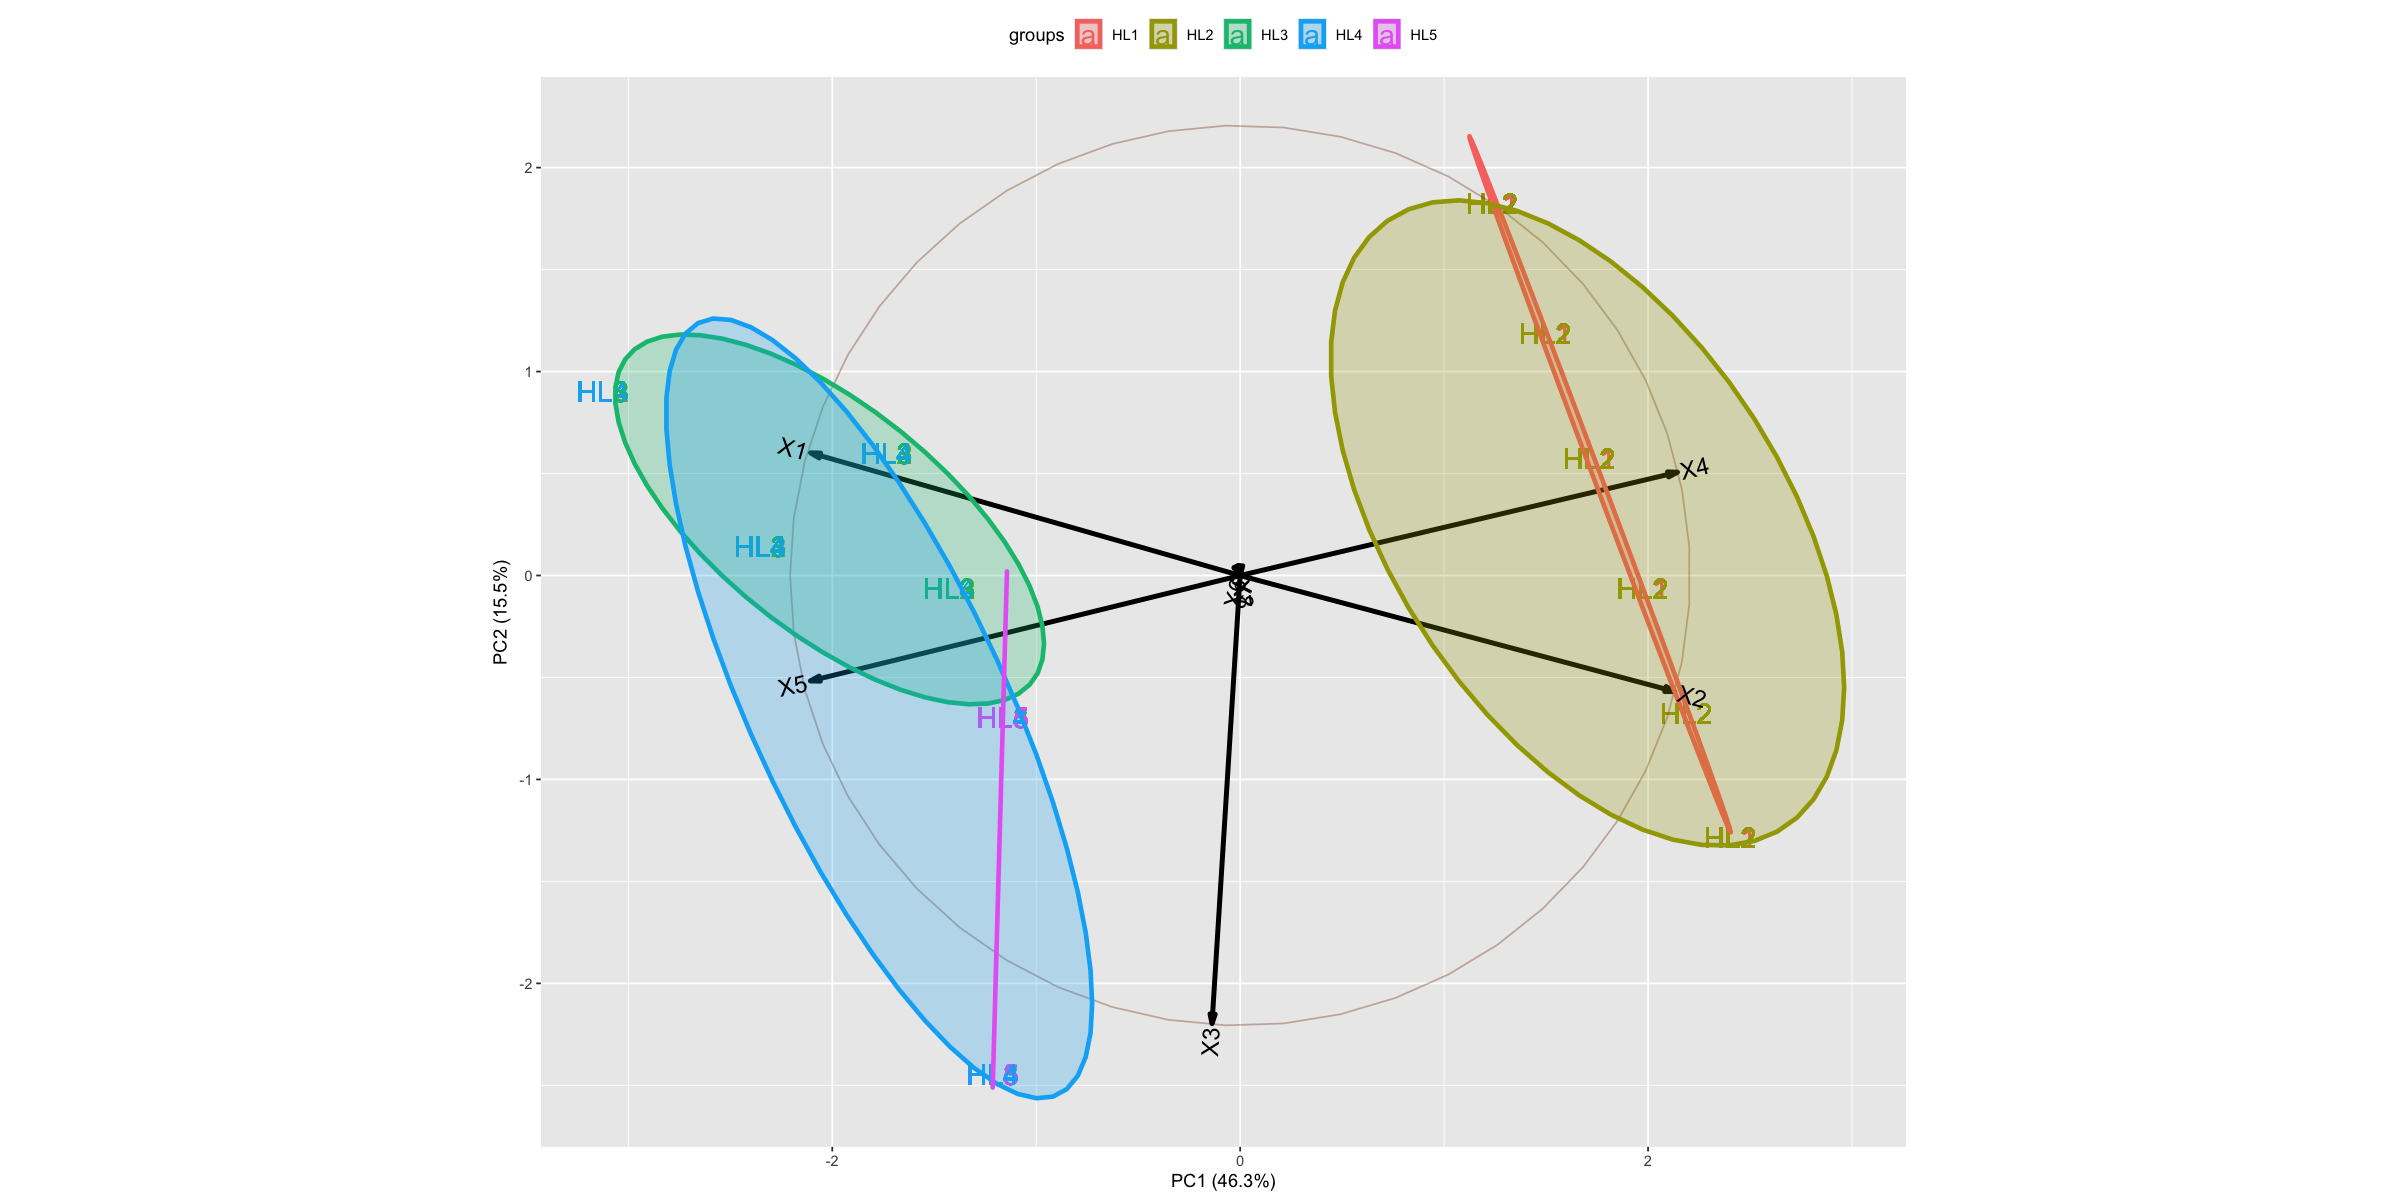

In [274]:
sm_y1 <- as.factor(data_raw$Y1_group)
ggbiplot( sm_pca, ellipse=TRUE, circle=TRUE, labels=sm_y1, groups = sm_y1,
          varname.size=5, labels.size=6, var.scale = 1, obs.scale = 1) +
          theme(legend.direction = 'horizontal', legend.position = 'top')

In [275]:
pv <- sm_pca$sdev^2 / sum(sm_pca$sdev^2)
pev <- cumsum(pv)
pev

[1] 0.4628674 0.6178488 0.7694694 0.8944694 0.9928488 0.9994431 1.0000000
[8] 1.0000000

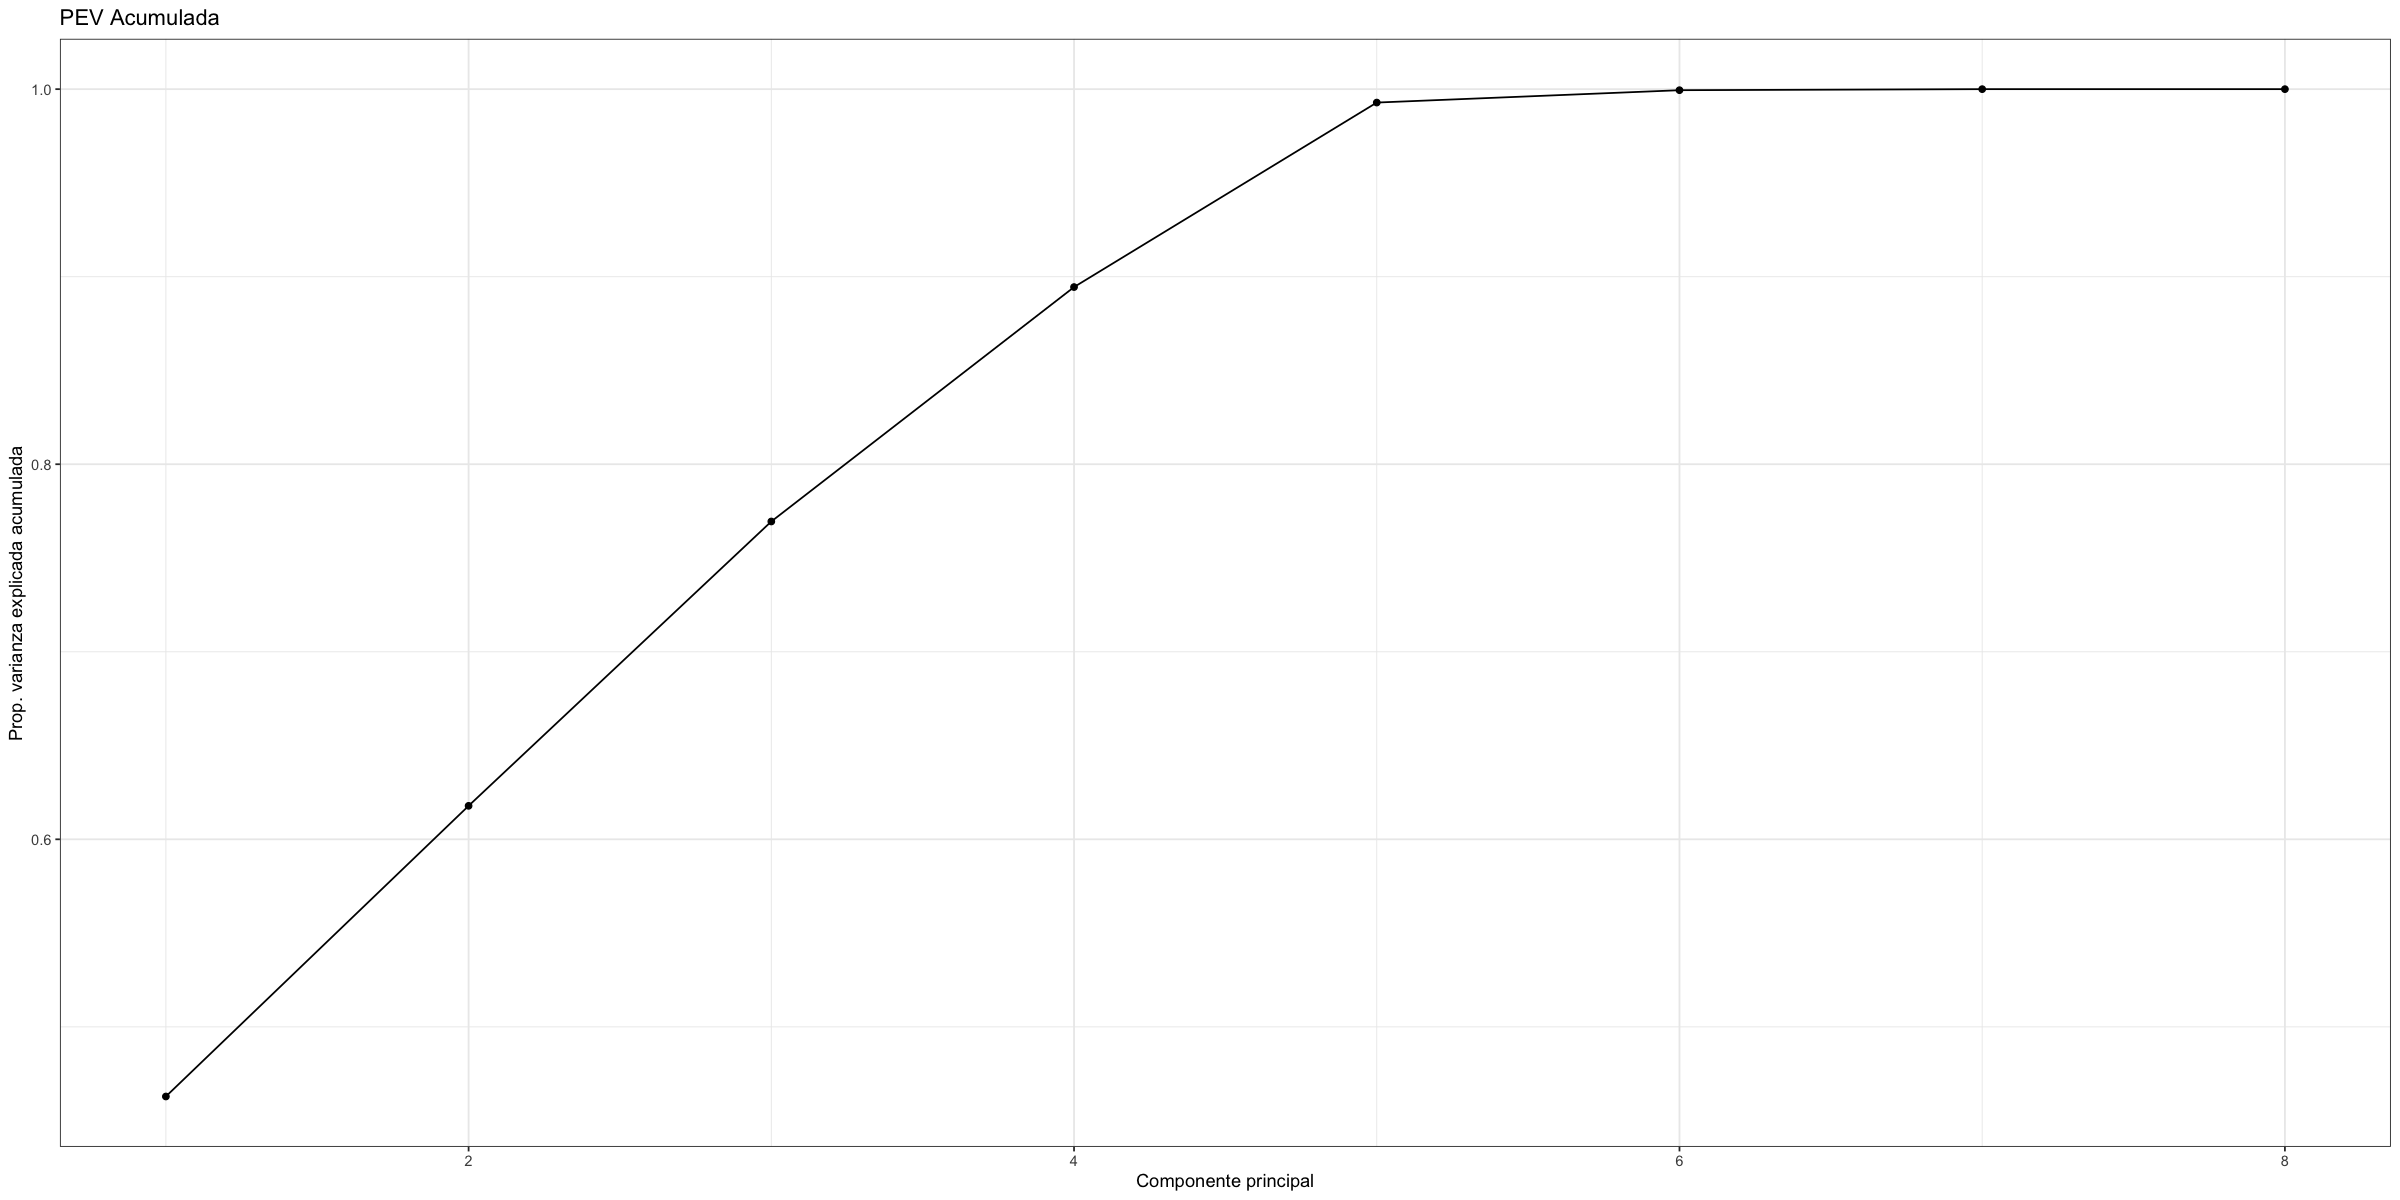

In [276]:
ggplot(data = data.frame(pev, pc = 1:8),
       aes(x = pc, y = pev, group = 1)) +
       geom_point() +
       geom_line() +
       ggtitle("PEV Acumulada")+
       theme_bw() +
       labs(x = "Componente principal",
            y = "Prop. varianza explicada acumulada")

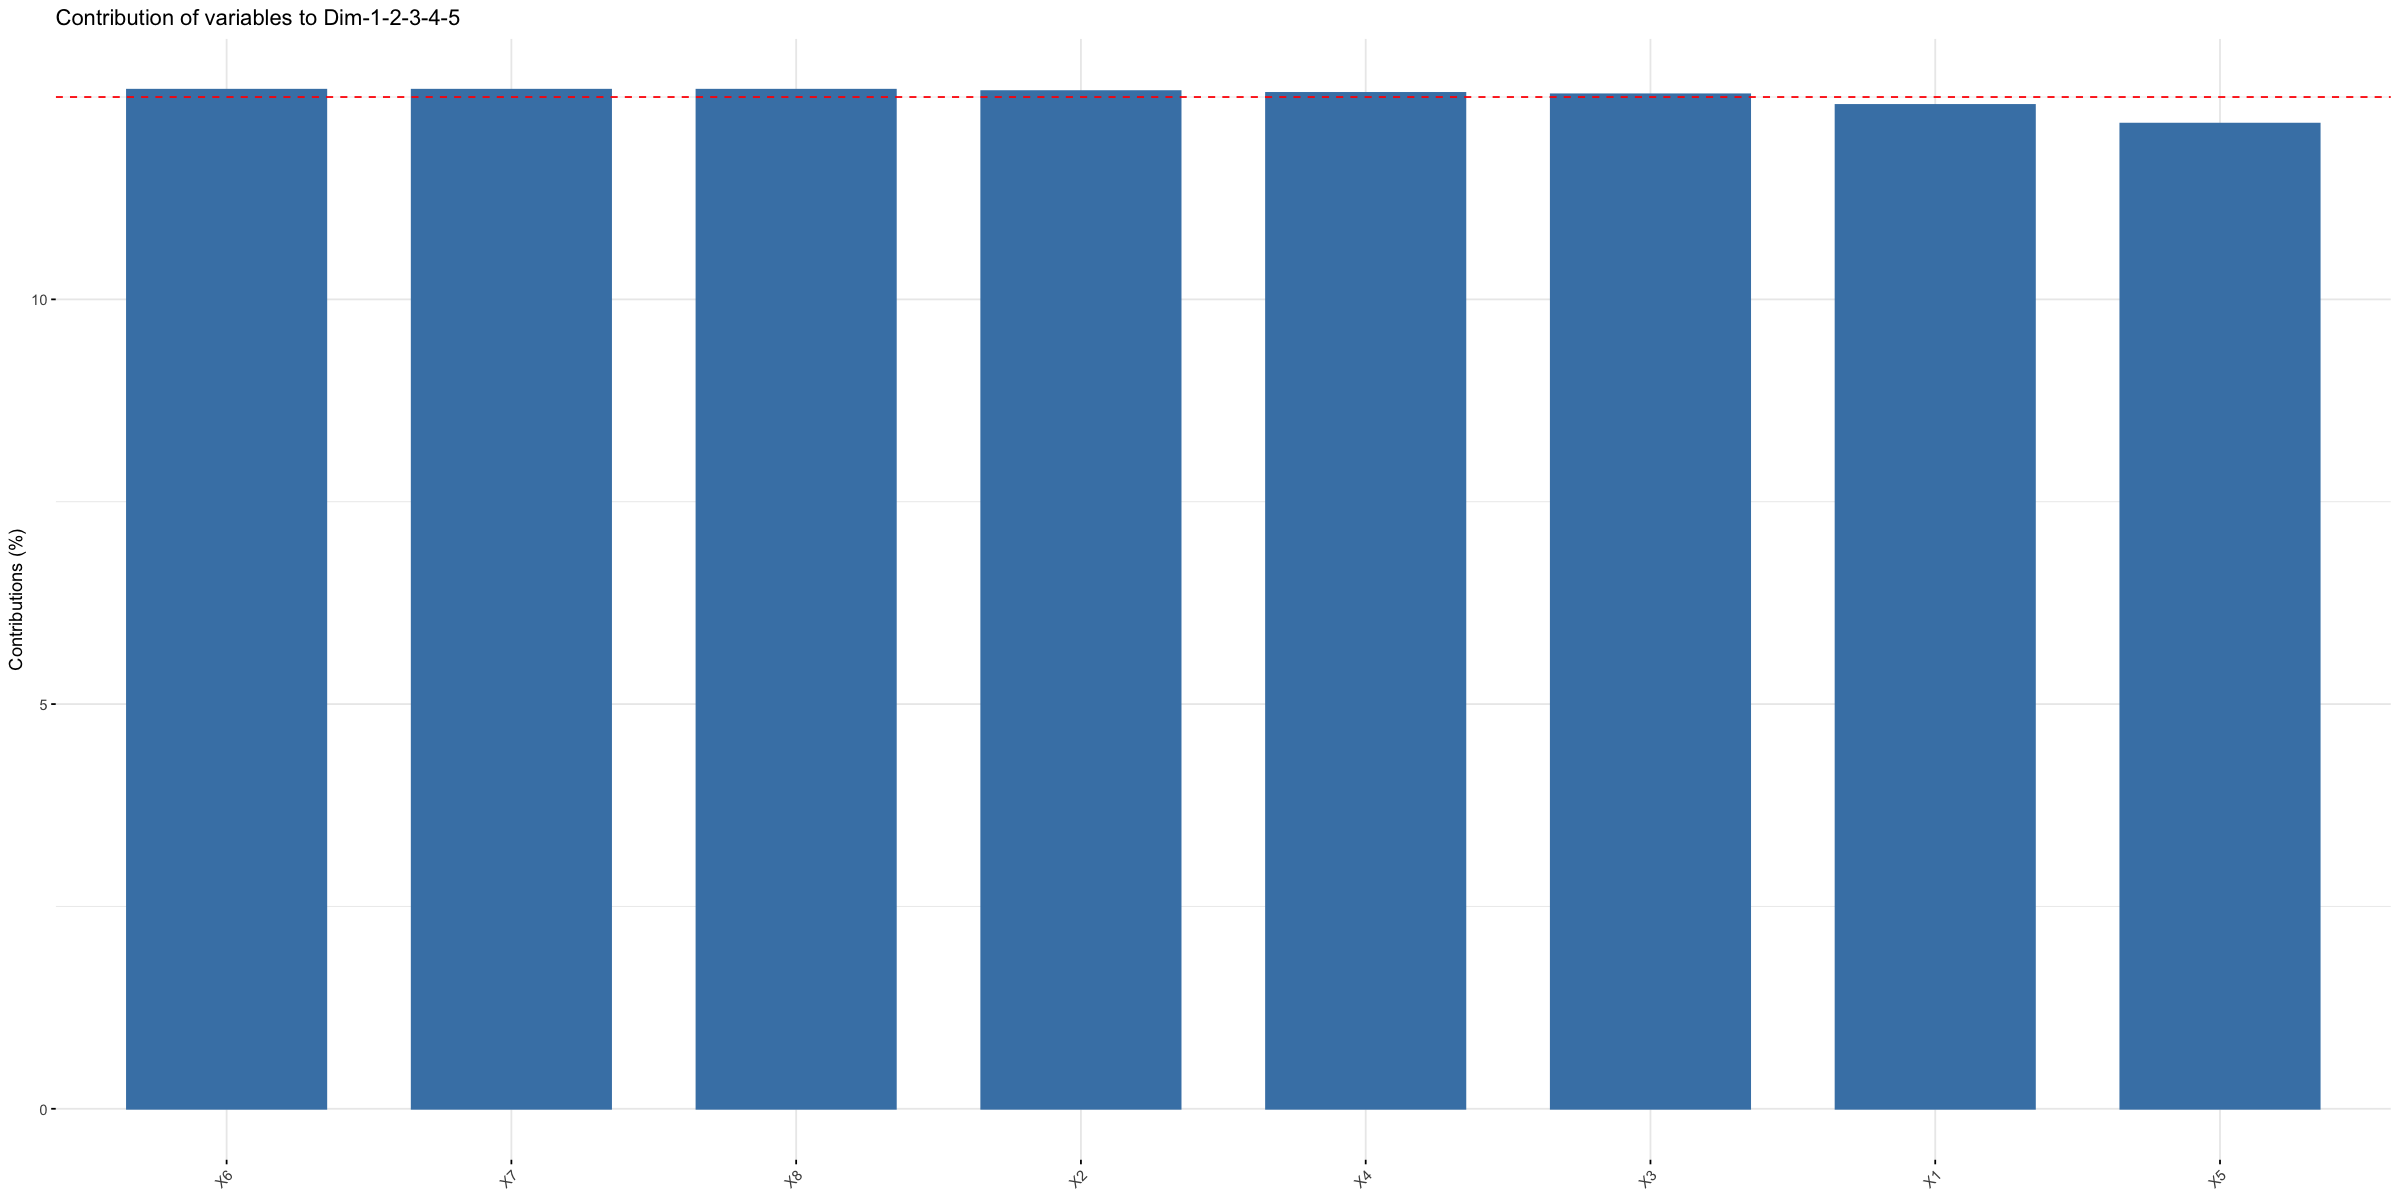

In [277]:
fviz_contrib(sm_pca, choice="var", axes=1:5)

In [297]:
sm_pca

Standard deviations (1, .., p=8):
[1] 1.924302e+00 1.113486e+00 1.101347e+00 1.000000e+00 8.871504e-01
[6] 2.296821e-01 6.674963e-02 5.624356e-15

Rotation (n x k) = (8 x 8):
             PC1           PC2           PC3           PC4           PC5
X1 -4.959514e-01  2.447347e-01 -2.999857e-15  2.988932e-18  1.143230e-16
X2  5.017330e-01 -2.315407e-01 -9.085733e-16 -1.173419e-16 -2.050135e-16
X3 -3.251430e-02 -8.942917e-01  2.450292e-15 -8.515885e-16 -2.649079e-16
X4  5.049622e-01  2.061208e-01 -2.090953e-15  9.708846e-17  1.930144e-16
X5 -4.962380e-01 -2.103580e-01 -7.611604e-16 -2.483572e-16 -1.445575e-16
X6 -1.396024e-16 -8.617253e-16 -4.579670e-16  1.000000e+00  1.173107e-15
X7  1.805211e-16 -2.382660e-15 -7.071068e-01 -1.131040e-15  7.071068e-01
X8  2.063341e-16 -1.841658e-15 -7.071068e-01  5.009014e-16 -7.071068e-01
             PC6           PC7           PC8
X1  4.951698e-01 -6.700328e-01  8.393415e-15
X2 -6.621217e-02 -5.048820e-01  6.598204e-01
X3  2.911152e-01 -8.743935e-02 -3

In [296]:
drops <- c("X6", "X7", "X8", "Y1", "Y2")
sm_reduced <- data_raw[ , !(names(data_raw) %in% drops)]
sm_reduced$Y1_group <- as.factor( sm_reduced$Y1_group )

head( sm_reduced, 3 )
tail( sm_reduced, 3 )

,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,HL2
2,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,HL2
3,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,HL2


,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
766,-1.362924,1.552931,1.123171,0.9718789,-0.9993487,HL2
767,-1.362924,1.552931,1.123171,0.9718789,-0.9993487,HL2
768,-1.362924,1.552931,1.123171,0.9718789,-0.9993487,HL2


In [279]:
levels_y1 <- levels(sm_reduced$Y1_group)

# Resumen de datos
for (level in levels_y1) {
  cat(paste0("=== Resumen de datos para ", level, " ===\n"))
  print(summary(sm_reduced[sm_reduced$Y1_group == level,]))
  cat("\n")
}


=== Resumen de datos para HL1 ===
       X1                X2               X3                X4        
 Min.   :-1.3629   Min.   :0.1622   Min.   :-1.6848   Min.   :0.9719  
 1st Qu.:-0.9848   1st Qu.:0.4404   1st Qu.:-1.1232   1st Qu.:0.9719  
 Median :-0.7012   Median :0.7185   Median :-0.5616   Median :0.9719  
 Mean   :-0.7579   Mean   :0.7741   Mean   :-0.4493   Mean   :0.9719  
 3rd Qu.:-0.5121   3rd Qu.:0.9967   3rd Qu.: 0.0000   3rd Qu.:0.9719  
 Max.   :-0.2285   Max.   :1.5529   Max.   : 1.1232   Max.   :0.9719  
       X5          Y1_group
 Min.   :-0.9993   HL1:20  
 1st Qu.:-0.9993   HL2: 0  
 Median :-0.9993   HL3: 0  
 Mean   :-0.9993   HL4: 0  
 3rd Qu.:-0.9993   HL5: 0  
 Max.   :-0.9993           

=== Resumen de datos para HL2 ===
       X1                X2                X3                X4         
 Min.   :-1.3629   Min.   :-1.7847   Min.   :-1.6848   Min.   :-1.4691  
 1st Qu.:-1.1738   1st Qu.: 0.4404   1st Qu.:-1.1232   1st Qu.: 0.9719  
 Median :-0.7012   

# 3. Generación de modelo

In [280]:
set.seed( 1237 )

sm_indexes   <- createDataPartition( sm_reduced$Y1_group, p=0.80, list = F )
sm_train.set_reduced <- sm_reduced[sm_indexes,]
sm_test.set_reduced  <- sm_reduced[-sm_indexes,]

In [281]:
prop.table(table(sm_train.set_reduced$Y1_group))


       HL1        HL2        HL3        HL4        HL5 
0.02597403 0.49025974 0.22077922 0.21753247 0.04545455 

In [282]:
prop.table(table(sm_test.set_reduced$Y1_group))


       HL1        HL2        HL3        HL4        HL5 
0.02631579 0.49342105 0.21710526 0.21710526 0.04605263 

In [283]:
dim( sm_train.set_reduced )
head( sm_train.set_reduced, 3 )

[1] 616   6

,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,HL2
3,2.040447,-1.784712,-0.5615855,-1.469119,0.9993487,HL2
5,1.284142,-1.228438,0.0000000,-1.197897,0.9993487,HL3


In [284]:
dim( sm_test.set_reduced )
head( sm_test.set_reduced, 3 )

[1] 152   6

,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,2.040447,-1.7847118,-0.5615855,-1.4691192,0.9993487,HL2
4,2.040447,-1.7847118,-0.5615855,-1.4691192,0.9993487,HL2
9,0.905990,-0.9503011,-0.5615855,-0.6554532,0.9993487,HL2


## Modelo

In [285]:
#Modelo de clasificación con instancia de entrenamiento
sm.tree_reduced <- C5.0( Y1_group ~ ., sm_train.set_reduced ) 

#Modelo basado en reglas
tree.rules_reduced <- C5.0( x = sm_train.set_reduced[,  -ncol(sm_train.set_reduced) ], y = sm_train.set_reduced$Y1_group, rules = T )

In [286]:
model_vars <- names(sm.tree_reduced$terms)
print(model_vars)

NULL


In [287]:
summary(sm.tree_reduced )


Call:
C5.0.formula(formula = Y1_group ~ ., data = sm_train.set_reduced)


C5.0 [Release 2.07 GPL Edition]  	Thu Jun 20 14:39:50 2024
-------------------------------

Class specified by attribute `outcome'

Read 616 cases (6 attributes) from undefined.data

Decision tree:

X5 <= -0.9993488: HL2 (310/16)
X5 > -0.9993488:
:...X3 > 0: HL4 (107/35)
    X3 <= 0:
    :...X1 <= 0.5278376: HL3 (50/2)
        X1 > 0.5278376:
        :...X3 <= -0.5615855: HL3 (100/37)
            X3 > -0.5615855: HL4 (49/19)


Evaluation on training data (616 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5  109(17.7%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	          16                      (a): class HL1
	         294     7     1          (b): class HL2
	               111    25          (c): class HL3
	                32   102          (d): class HL4
	                      28          (e): class HL5


	Attribute usage:

	100

In [288]:
sm_test.set_reduced

,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,2.04044700,-1.7847118,-0.5615855,-1.4691192,0.9993487,HL2
4,2.04044700,-1.7847118,-0.5615855,-1.4691192,0.9993487,HL2
9,0.90598998,-0.9503011,-0.5615855,-0.6554532,0.9993487,HL2
13,0.52783764,-0.6721642,0.0000000,-0.6554532,0.9993487,HL2
16,0.52783764,-0.6721642,0.0000000,-0.6554532,0.9993487,HL2
24,-0.03939087,-0.1158904,2.2463421,-1.1978972,0.9993487,HL3
32,-0.51208129,0.4403834,-1.1231710,0.9718789,-0.9993487,HL1
37,-0.98477172,0.9966573,0.0000000,0.9718789,-0.9993487,HL1
43,-1.17384789,1.2747942,0.5615855,0.9718789,-0.9993487,HL2


In [289]:
# Predicción de clases con instancia de pruebas
tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

# Probabilidad por clases
tree.pred.prob_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "prob")


In [290]:
head( tree.pred.prob_reduced, 3 )

,HL1,HL2,HL3,HL4,HL5
2,0.0002571686,0.05435901,0.6259483,0.3189855,0.000450045
4,0.0002571686,0.05435901,0.6259483,0.3189855,0.000450045
9,0.0002571686,0.05435901,0.6259483,0.3189855,0.000450045


In [291]:
tree.pred.class_reduced

[1] HL3 HL3 HL3 HL3 HL3 HL4 HL2 HL2 HL2 HL2 HL2 HL3 HL3 HL2 HL2 HL2 HL2 HL2
 [19] HL3 HL4 HL4 HL3 HL3 HL4 HL4 HL4 HL2 HL2 HL2 HL2 HL2 HL2 HL3 HL3 HL4 HL4
 [37] HL4 HL2 HL2 HL2 HL2 HL3 HL4 HL2 HL2 HL2 HL2 HL4 HL4 HL3 HL3 HL3 HL4 HL4
 [55] HL2 HL2 HL2 HL2 HL2 HL2 HL3 HL3 HL4 HL2 HL2 HL2 HL2 HL3 HL4 HL3 HL4 HL2
 [73] HL3 HL3 HL3 HL4 HL4 HL2 HL2 HL2 HL2 HL3 HL4 HL3 HL3 HL4 HL4 HL2 HL2 HL2
 [91] HL4 HL4 HL3 HL3 HL3 HL2 HL2 HL2 HL2 HL2 HL3 HL3 HL4 HL4 HL2 HL3 HL4 HL4
[109] HL4 HL3 HL4 HL4 HL2 HL2 HL2 HL2 HL2 HL2 HL3 HL3 HL4 HL4 HL3 HL3 HL3 HL4
[127] HL2 HL2 HL2 HL2 HL2 HL2 HL2 HL2 HL3 HL4 HL2 HL2 HL2 HL2 HL2 HL3 HL4 HL3
[145] HL3 HL2 HL2 HL2 HL2 HL2 HL2 HL2
Levels: HL1 HL2 HL3 HL4 HL5

In [292]:
dev.new( width=10, height=10 )

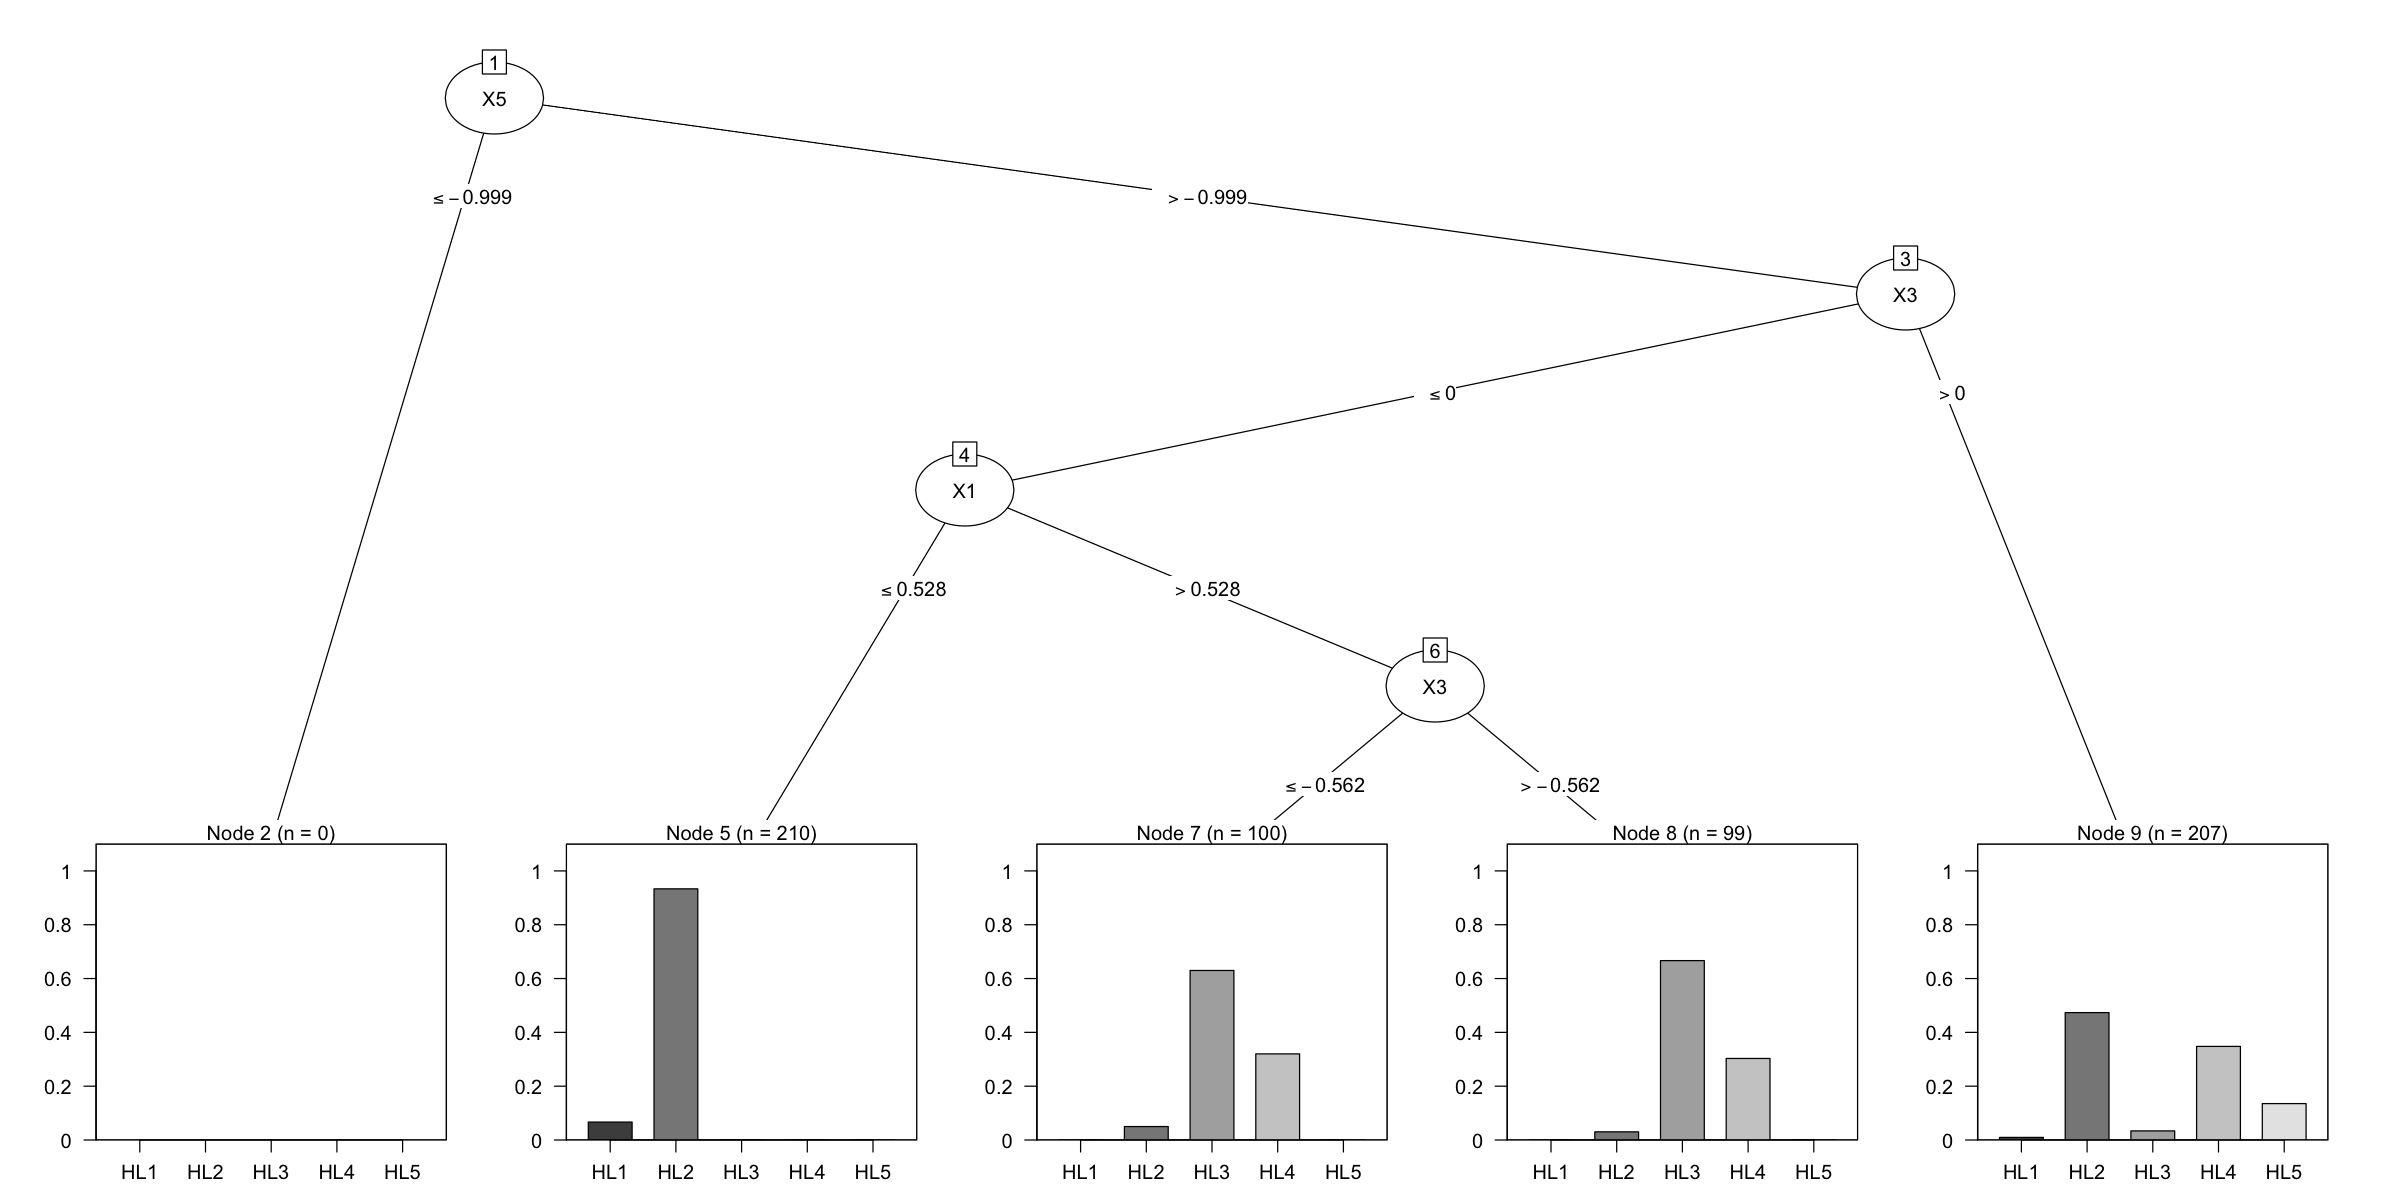

In [293]:
options(repr.plot.width=20, repr.plot.height=10)
plot( sm.tree_reduced )

In [294]:
summary( tree.rules_reduced )


Call:
C5.0.default(x = sm_train.set_reduced[, -ncol(sm_train.set_reduced)], y
 = sm_train.set_reduced$Y1_group, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Thu Jun 20 14:39:50 2024
-------------------------------

Class specified by attribute `outcome'

Read 616 cases (6 attributes) from undefined.data

Rules:

Rule 1: (310/16, lift 1.9)
	X5 <= -0.9993488
	->  class HL2  [0.946]

Rule 2: (199/70, lift 2.9)
	X3 <= 0
	X5 > -0.9993488
	->  class HL3  [0.647]

Rule 3: (107/35, lift 3.1)
	X3 > 0
	X5 > -0.9993488
	->  class HL4  [0.670]

Default class: HL2


Evaluation on training data (616 cases):

	        Rules     
	  ----------------
	    No      Errors

	     3  121(19.6%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	          16                      (a): class HL1
	         294     8                (b): class HL2
	               129     7          (c): class HL3
	                62    72          (d): class HL4
	                      2

In [78]:
conf.matrix.tree_reduced <- confusionMatrix(table( sm_test.set_reduced$Y1_group, tree.pred.class_reduced ))
print( conf.matrix.tree_reduced )

Confusion Matrix and Statistics

         tree.pred.class_reduced
          Rango 1 Rango 2 Rango 3 Rango 4
  Rango 1      60       1       0       0
  Rango 2       3      12      10       0
  Rango 3       0       0      40       2
  Rango 4       0       0       5      19

Overall Statistics
                                          
               Accuracy : 0.8618          
                 95% CI : (0.7966, 0.9124)
    No Information Rate : 0.4145          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.802           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Rango 1 Class: Rango 2 Class: Rango 3
Sensitivity                  0.9524        0.92308         0.7273
Specificity                  0.9888        0.90647         0.9794
Pos Pred Value               0.9836        0.48000         0.9524
Neg Pred Value               0

## Boosting

In [75]:
sm.tree_reduced <- C5.0(Y1_group ~ ., data = sm_train.set_reduced, trials = 10)


In [76]:
any(is.na(sm_test.set_reduced))

sm_test.set_reduced <- na.omit(sm_test.set_reduced)


[1] FALSE

In [77]:
# Predicción de clases con instancia de pruebas
tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

# Probabilidad por clases
tree.pred.prob_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "prob")


In [78]:
library(caret)
confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1_group, positive = "yes")


Confusion Matrix and Statistics

          Reference
Prediction Rango 1 Rango 2 Rango 3 Rango 4
   Rango 1      61      15       0       0
   Rango 2       0       0       0       0
   Rango 3       0      10      40       5
   Rango 4       0       0       2      19

Overall Statistics
                                         
               Accuracy : 0.7895         
                 95% CI : (0.716, 0.8513)
    No Information Rate : 0.4013         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6893         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: Rango 1 Class: Rango 2 Class: Rango 3
Sensitivity                  1.0000         0.0000         0.9524
Specificity                  0.8352         1.0000         0.8636
Pos Pred Value               0.8026            NaN         0.7273
Neg Pred Value               1.0000         0.8

In [ ]:
modeloc50_1 <- C5.0(data_training[-17], data_training$default, trials = 10) 
data_predicted2 <- predict(modeloc50_1, data_test)
confusionMatrix(data = data_predicted2, reference = data_test$default, positive = "yes")

In [80]:
accuracy_results <- data.frame(Trials = integer(), Accuracy = double())

for (trials in c(1, 5, 10, 20, 50, 100)) {
  sm.tree_reduced <- C5.0(Y1_group ~ ., data = sm_train.set_reduced, trials = trials)
  tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")
  
  cm <- confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1_group, positive = "yes")
  
  accuracy_results <- rbind(accuracy_results, data.frame(Trials = trials, Accuracy = cm$overall["Accuracy"]))
}

print(accuracy_results)

          Trials  Accuracy
Accuracy       1 0.8618421
Accuracy1      5 0.8026316
Accuracy2     10 0.7894737
Accuracy3     20 0.8618421
Accuracy4     50 0.7894737
Accuracy5    100 0.7894737


In [82]:
train_control <- trainControl(method = "cv", number = 10)

tuned_model <- train(
  Y1_group ~ ., 
  data = sm_train.set_reduced, 
  method = "C5.0",
  trControl = train_control,
  tuneGrid = expand.grid(trials = c(1, 5, 10, 20, 50, 100), model = "tree", winnow = FALSE)
)

print(tuned_model$bestTune)

best_model <- C5.0(Y1_group ~ ., data = sm_train.set_reduced, trials = tuned_model$bestTune$trials)
tree.pred.class_reduced <- predict(best_model, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

cm <- confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1_group, positive = "yes")
print(cm)

Warning message:
"'trials' should be <= 12 for this object. Predictions generated using 12 trials"
Warning message:
"'trials' should be <= 12 for this object. Predictions generated using 12 trials"
Warning message:
"'trials' should be <= 22 for this object. Predictions generated using 22 trials"
Warning message:
"'trials' should be <= 22 for this object. Predictions generated using 22 trials"
Warning message:
"'trials' should be <= 23 for this object. Predictions generated using 23 trials"
Warning message:
"'trials' should be <= 20 for this object. Predictions generated using 20 trials"
Warning message:
"'trials' should be <= 14 for this object. Predictions generated using 14 trials"
Warning message:
"'trials' should be <= 14 for this object. Predictions generated using 14 trials"
Warning message:
"'trials' should be <= 19 for this object. Predictions generated using 19 trials"
Warning message:
"'trials' should be <= 19 for this object. Predictions generated using 19 trials"
Warning me

  trials model winnow
1      1  tree  FALSE
Confusion Matrix and Statistics

          Reference
Prediction Rango 1 Rango 2 Rango 3 Rango 4
   Rango 1      60       3       0       0
   Rango 2       1      12       0       0
   Rango 3       0      10      40       5
   Rango 4       0       0       2      19

Overall Statistics
                                          
               Accuracy : 0.8618          
                 95% CI : (0.7966, 0.9124)
    No Information Rate : 0.4013          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.802           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Rango 1 Class: Rango 2 Class: Rango 3
Sensitivity                  0.9836        0.48000         0.9524
Specificity                  0.9670        0.99213         0.8636
Pos Pred Value               0.9524        0.92308         0